In [1]:
#pip install matplotlib

In [43]:
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [44]:
#import sys

In [45]:
# !{sys.executable} -m pip install install --upgrade scikit-learn

In [46]:
# Read data
# 1 = male , 2 = female 
file_path = Path("Resources/final_panel_data.csv")
panel_df = pd.read_csv(file_path)

panel_df.head()

,year,gender,region,relation_to_head_of_house,age,years_of_education,annual_hours,annual_income,white,black,...,protective,foodcare,building,sales,office_admin,farmer,construction,production,transport.2,transport.3
0,1981,1,1.0,10,34,16.0,1600,10000.0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1981,1,2.0,10,32,14.0,520,9095.0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2009,1,1.0,10,64,12.0,2550,45200.0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1999,1,2.0,10,50,12.0,3072,25000.0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1990,1,3.0,10,26,12.0,2100,24500.0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
panel_df_plot = panel_df.hvplot.scatter(
    x= "years_of_education",
    y= "annual_income", color = "gender"
)
panel_df_plot

:Scatter   [years_of_education]   (annual_income,gender)

In [48]:
panel_df = panel_df.dropna()

In [49]:
pd.get_dummies(panel_df)
df = panel_df.drop("occupation_category", axis = 1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33121 entries, 0 to 33397
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        33121 non-null  int64  
 1   gender                      33121 non-null  int64  
 2   region                      33121 non-null  float64
 3   relation_to_head_of_house   33121 non-null  int64  
 4   age                         33121 non-null  int64  
 5   years_of_education          33121 non-null  float64
 6   annual_hours                33121 non-null  int64  
 7   annual_income               33121 non-null  float64
 8   white                       33121 non-null  int64  
 9   black                       33121 non-null  int64  
 10  hisp                        33121 non-null  int64  
 11  other_race                  33121 non-null  int64  
 12  degree                      33121 non-null  float64
 13  09_updated_degree           331

In [51]:
# Data Preparation

In [52]:
from sklearn.model_selection import train_test_split
X = df.drop("annual_income", axis = 1)
y = df["annual_income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [53]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 300)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [54]:
#df["occupation_category"].value_counts()

In [55]:
model.feature_importances_

array([1.05502006e-03, 1.78273461e-04, 7.93385812e-04, 1.37905254e-04,
       1.09812457e-03, 2.91527460e-04, 1.25335347e-01, 9.09989965e-04,
       8.69336868e-04, 3.98545889e-06, 4.20671034e-06, 5.38787740e-04,
       2.75485809e-04, 3.60144063e-04, 2.59891679e-03, 7.91961482e-05,
       7.16088172e-03, 2.41262612e-06, 2.54406615e-03, 8.76566773e-04,
       6.78812980e-04, 1.24184590e-04, 6.33068745e-01, 1.12806291e-03,
       2.08096138e-01, 5.81973684e-03, 5.35761251e-04, 1.11010857e-03,
       4.80849772e-04, 2.58017544e-04, 8.19514716e-05, 7.71861889e-07,
       7.08102817e-05, 3.26656933e-05, 4.73379129e-04, 1.40020711e-05,
       1.00087908e-05, 1.88777038e-06, 2.23191128e-05, 1.31873162e-04,
       1.37536967e-04, 6.34970491e-04, 2.68334259e-04, 9.41769685e-07,
       9.51210039e-05, 5.89096359e-06, 5.25023647e-05, 4.55838483e-06,
       3.73105610e-04, 2.83016592e-06, 4.70366789e-06, 3.06303582e-06,
       5.28381457e-06, 5.13399137e-06, 1.16576224e-06, 2.77239909e-06,
      

<BarContainer object of 71 artists>

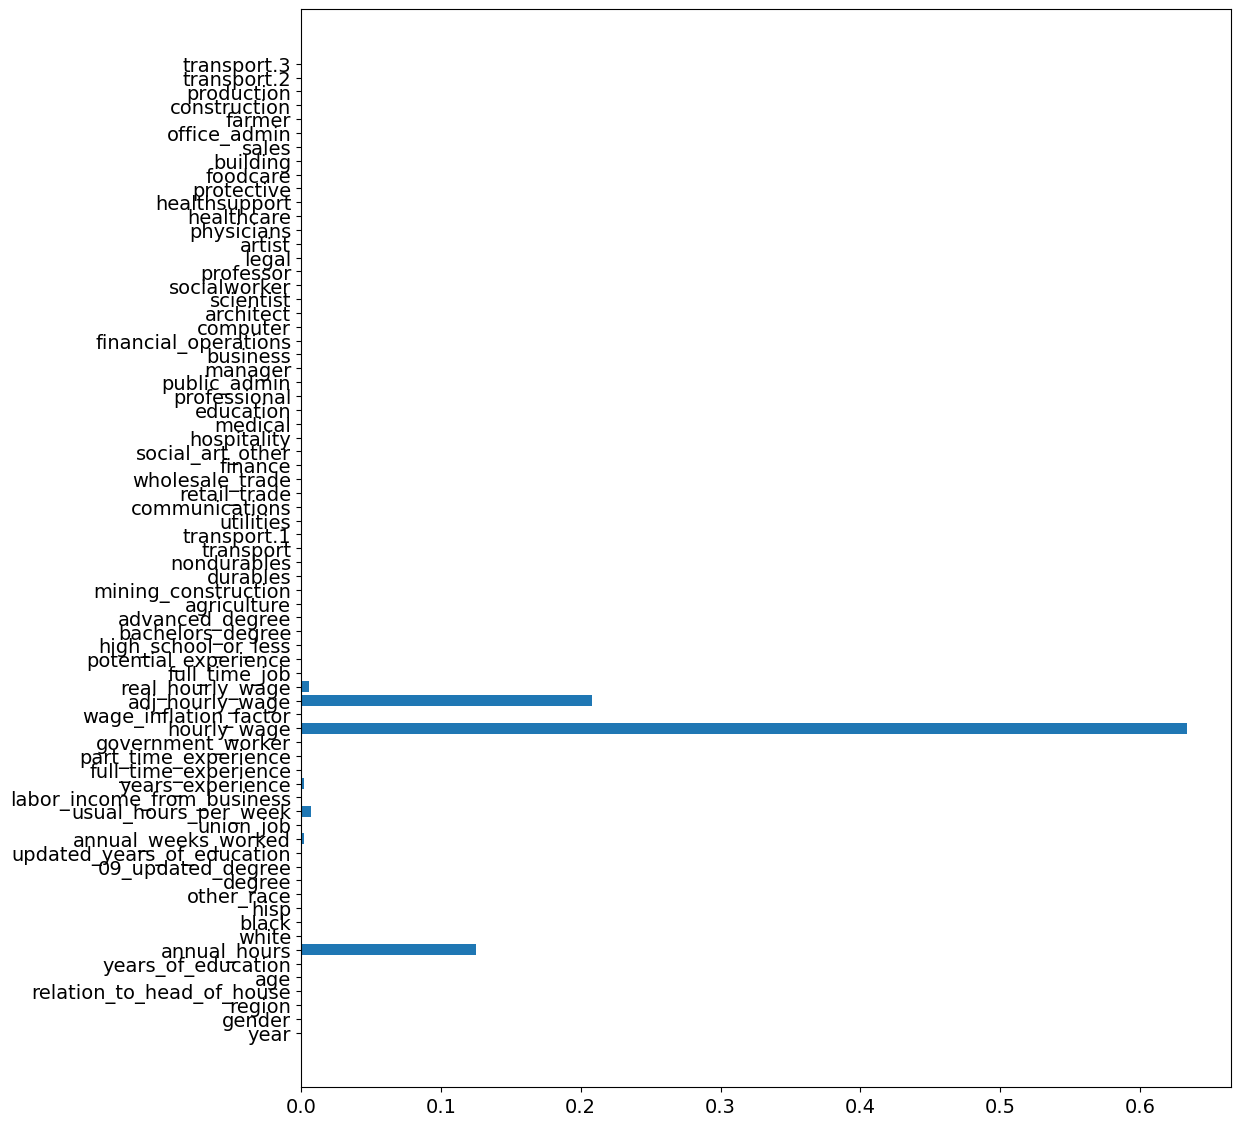

In [56]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 14.0)})
plt.rcParams.update({'font.size': 14})
plt.barh(X.columns, model.feature_importances_)


In [57]:
X = X.drop(["real_hourly_wage", "adj_hourly_wage", "hourly_wage", "usual_hours_per_week", "annual_weeks_worked", "annual_hours"], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [58]:
model = RandomForestRegressor(n_estimators = 300)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

<BarContainer object of 65 artists>

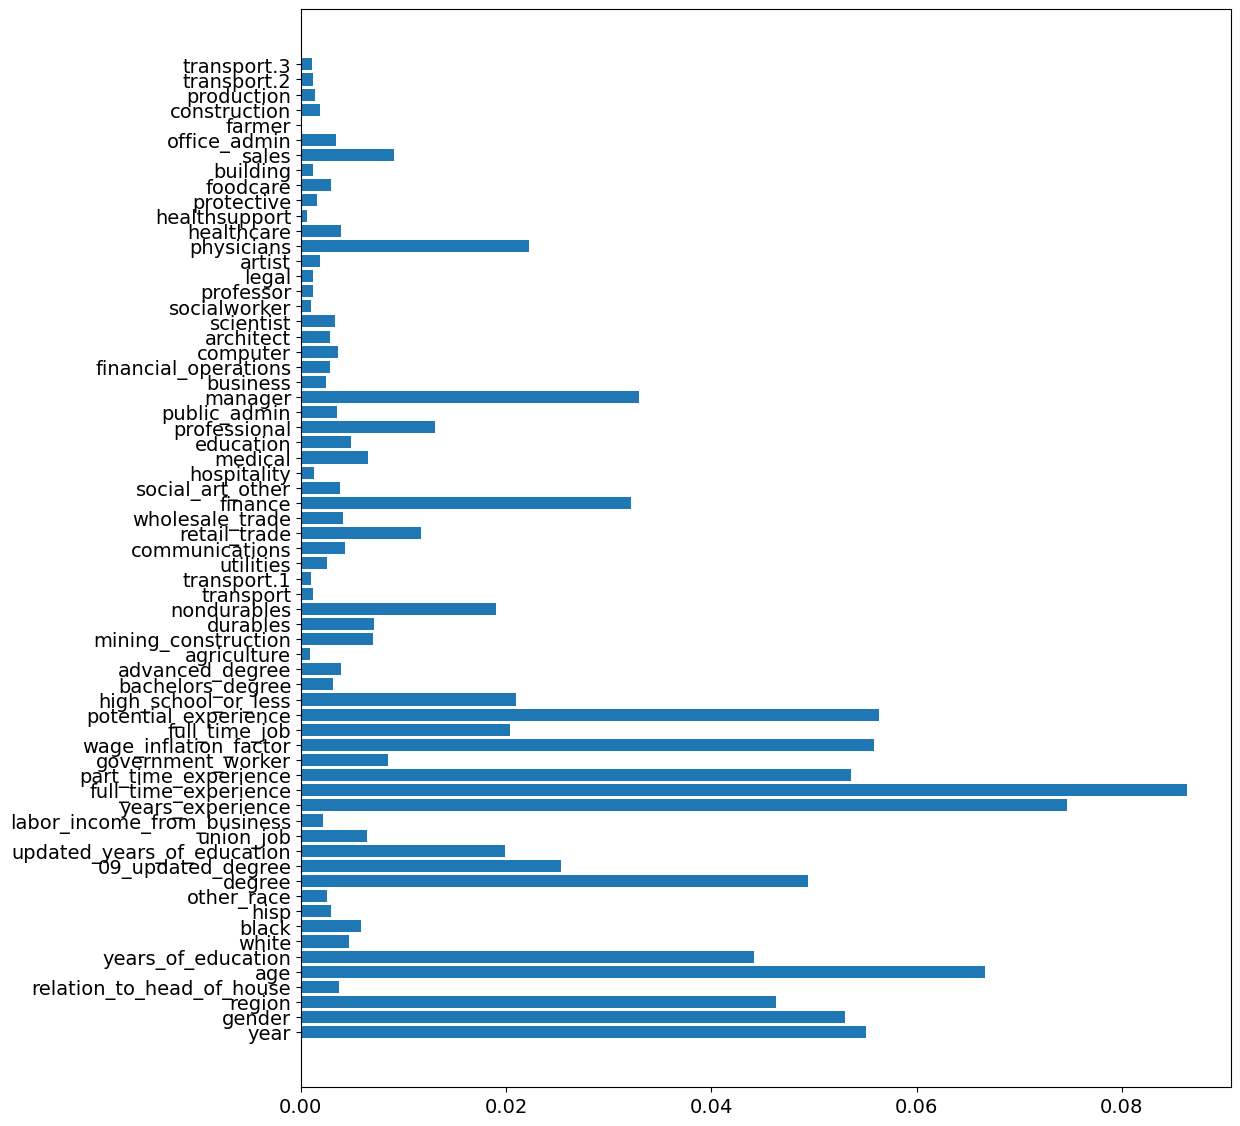

In [59]:
plt.barh(X.columns, model.feature_importances_)


In [60]:
df1 = df.loc[df["gender"]==1]
X = df1.drop("annual_income", axis = 1)
y = df1["annual_income"]
X = X.drop(["real_hourly_wage", "adj_hourly_wage", "hourly_wage", "usual_hours_per_week", "annual_weeks_worked", "annual_hours"], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [61]:
model = RandomForestRegressor(n_estimators = 300)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

<BarContainer object of 65 artists>

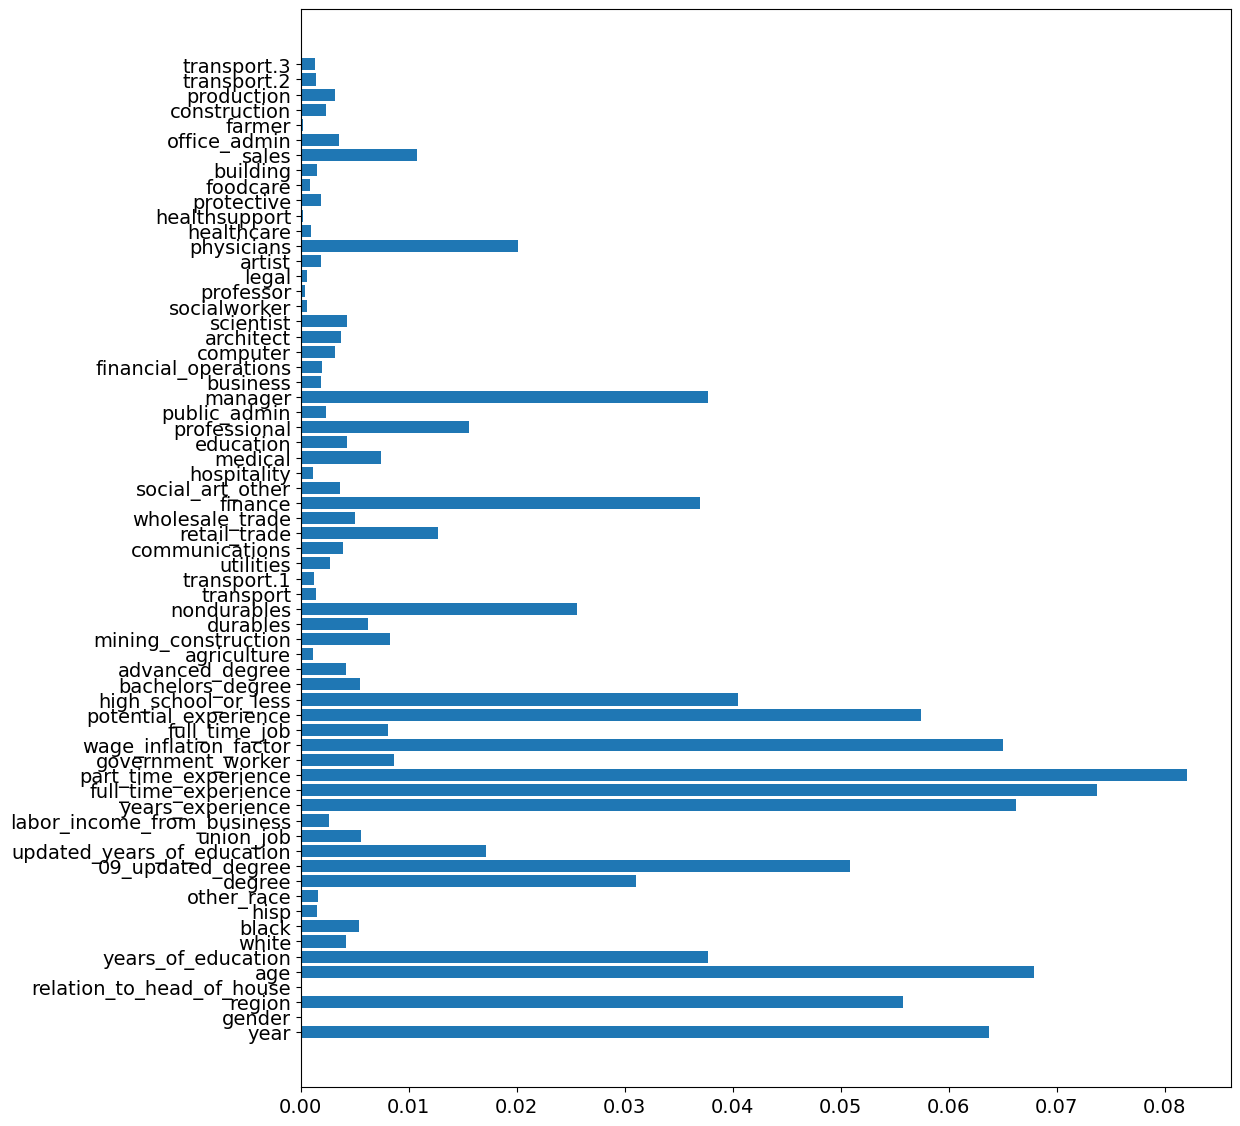

In [62]:
plt.barh(X.columns, model.feature_importances_)

In [86]:
# Female
df2 = df.loc[df["gender"]==2]
X = df1.drop("annual_income", axis = 1)
y = df1["annual_income"]
X = X.drop(["real_hourly_wage", "adj_hourly_wage", "hourly_wage", "usual_hours_per_week", "annual_weeks_worked", "annual_hours"], axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [87]:
model = RandomForestRegressor(n_estimators = 300)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

<BarContainer object of 65 artists>

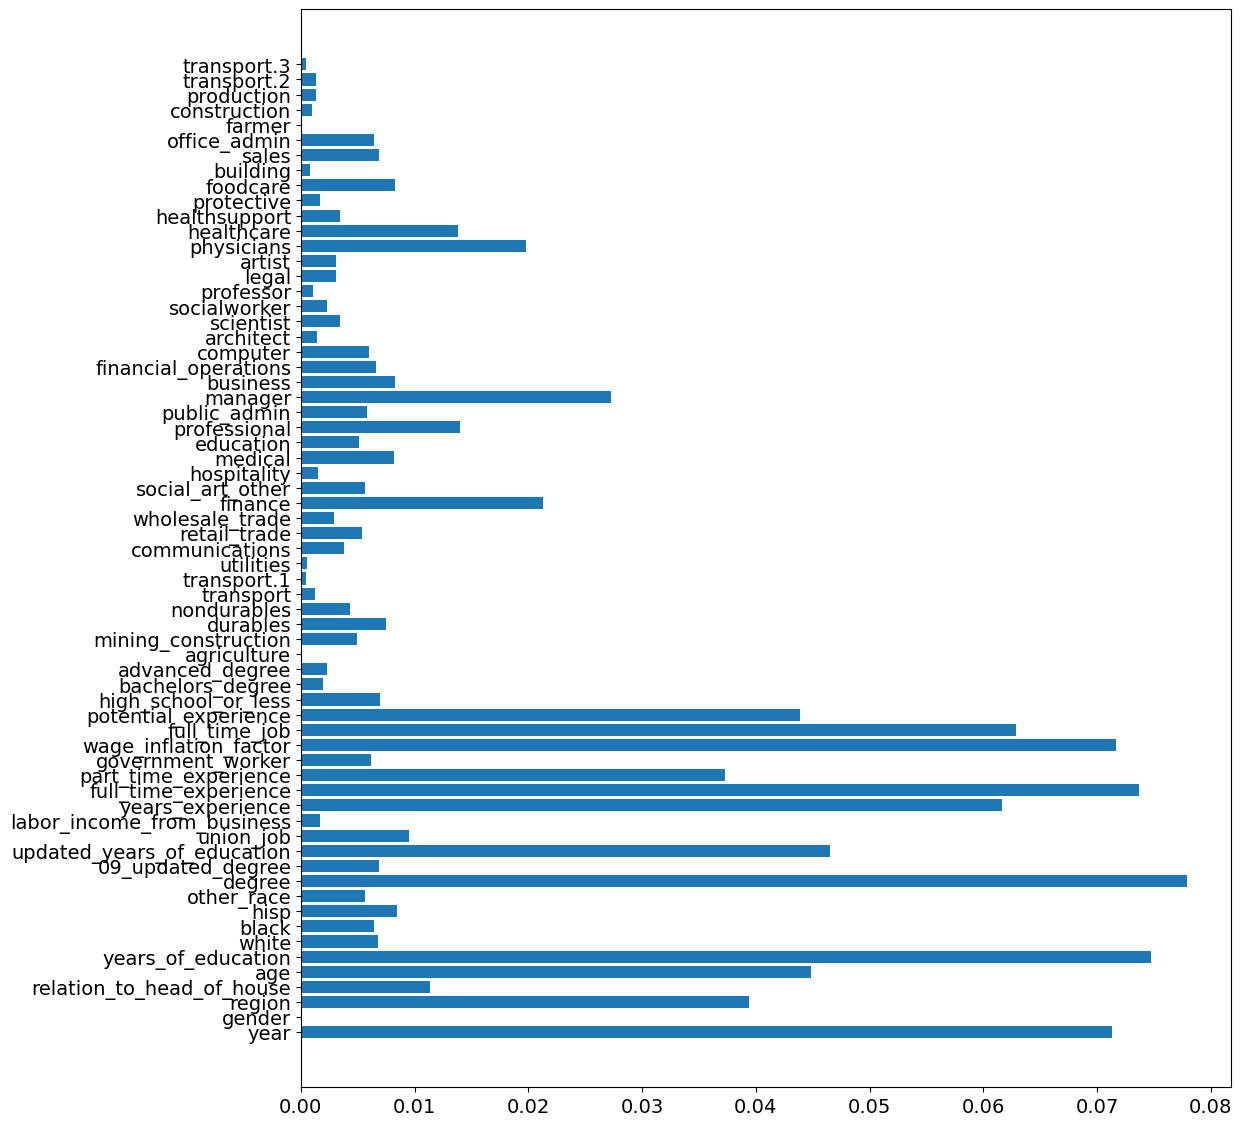

In [88]:
plt.barh(X.columns, model.feature_importances_)

In [89]:
# Reformat data of the independent variable X as a single column array
X = df1["annual_income"].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[11300.],
       [28500.],
       [53000.],
       [49800.],
       [26000.]])

In [90]:
X.shape

(17026, 1)

In [91]:
y = df1["annual_income"]

In [92]:
# Building a linear regression model

In [93]:
# Create a model with scikit-learn
model = LinearRegression()

In [94]:
model.fit(X, y)

LinearRegression()

In [95]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [1.]


In [97]:
# Display the y intercept
print(f"Model's y intercept: {model.intercept_}")

Model's y intercept: -1.6007106751203537e-10


In [99]:
# Display the model's best fit line formula
print(f"Model's formula: y= {model.intercept_} + {model.coef_[0]}X")

Model's formula: y= -1.6007106751203537e-10 + 1.0000000000000056X


In [102]:
# Display the forumula to predict the annual income for a Male with 7 years of experience 
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]} *7")

# Predict the annual income for a Male with 7 years of experience 
y_7 = model.intercept_ + model.coef_[0] *7

#Display the prediction
print(f"Predicted annual income for a male employee with 7 years of experience: ${y_7:.2f}")

Model's formula: y = -1.6007106751203537e-10 + 1.0000000000000056 *7
Predicted annual income for a male employee with 7 years of experience: $7.00


In [103]:
predicted_y_values = model.predict(X)

In [105]:
# Create a copy of the original data
df1_annual_income_predicted = df1.copy()

# Add a column with the predicted income values
df1_annual_income_predicted["annual_income_predicted"] = predicted_y_values

#Display the sample data
df1_annual_income_predicted.head()

,year,gender,region,relation_to_head_of_house,age,years_of_education,annual_hours,annual_income,white,black,...,foodcare,building,sales,office_admin,farmer,construction,production,transport.2,transport.3,annual_income_predicted
16236,1981,2,3.0,20,35,10.0,1972,11300.0,1,0,...,0,0,0,0,0,0,0,0,0,11300.0
16237,2007,2,2.0,10,26,11.0,2480,28500.0,1,0,...,0,0,0,0,0,0,0,1,1,28500.0
16238,2009,2,3.0,20,59,18.0,1480,53000.0,1,0,...,0,0,0,0,0,0,0,0,0,53000.0
16239,2007,2,3.0,10,45,14.0,2530,49800.0,0,1,...,0,0,0,1,0,0,0,0,0,49800.0
16240,1999,2,1.0,20,30,12.0,2059,26000.0,1,0,...,0,0,0,0,0,0,0,0,0,26000.0


In [107]:
# Create a line plot of the predicted salary values 
best_fit_line = df1_annual_income_predicted.hvplot.line(
    x = "years_experience",
    y = "annual_income_predicted",
    color = "red")
best_fit_line

:Curve   [years_experience]   (annual_income_predicted)